In [50]:
!pip install geopandas

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/c4/64/7d344cfcef5efddf9cf32f59af7f855828e9d74b5f862eddf5bfd9f25323/geopandas-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyogrio>=0.7.2 from https://files.pythonhosted.org/packages/9d/66/ddb1c74c06c858ddbe889c68fea177d1d9c711af553d355417bdef8eaf17/pyogrio-0.9.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/79/95/eb68113c5b5737c342bde1bab92705dabe69c16299c5a122616e50f1fbd6/pyproj-3.6.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=2.0.0 from https://files.pythonhosted.org/packages/b1/5a/6a67d929c467a1973b6bb9f0b00159cc343b02bf9a8d26db1abd2f87aa23/shapely-2.0.6-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ---------------- ----------------------- 133.1/323.6 kB 8.2 MB/s eta 0:00:01
   

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
from math import pi
import csv

In [36]:
path ="C:/Users/CSED/Desktop/DS Crime/districtwise-crime-against-women.csv"
data = pd.read_csv(path)

print(data.columns)

Index(['id', 'year', 'state_name', 'state_code', 'district_name',
       'district_code', 'registeration_circles',
       'murder_with_rape_or_gang_rape', 'dowry_deaths',
       'abetment_to_suicide_of_women', 'miscarriage', 'acid_attack',
       'attempt_to_acid_attack', 'cruelty_by_husband_or_his_relatives',
       'kidnapping_and_abduction_of_women_total', 'human_trafficking',
       'selling_of_minor_girls', 'buying_of_minor_girls', 'rape',
       'attempt_to_commit_rape',
       'assault_on_women_with_intent_to_outrage_her_modesty',
       'insult_to_the_modesty_of_women', 'dowry_prohibition',
       'immoral_traffic_prevention_act_total',
       'protection_of_women_from_domestic_violence_act',
       'cyber_crimes_or_infor_tech_women_centric_crimes',
       'prot_of_children_frm_sexual_viol_girl_child_victims',
       'indecent_representation_of_women_prohibition',
       'total_crime_against_women'],
      dtype='object')


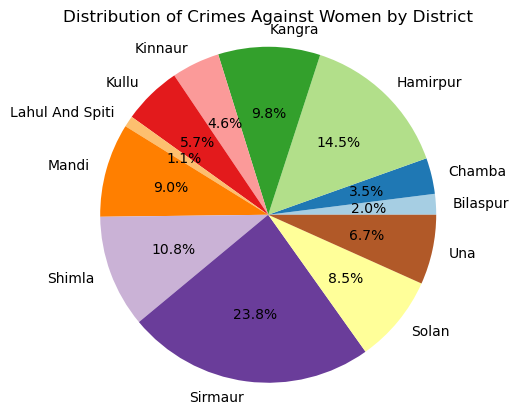

In [42]:
district_total_crimes = data.groupby('district_name')['total_crime_against_women'].sum()
plt.pie(district_total_crimes, labels=district_total_crimes.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(district_total_crimes))))
plt.title('Distribution of Crimes Against Women by District')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

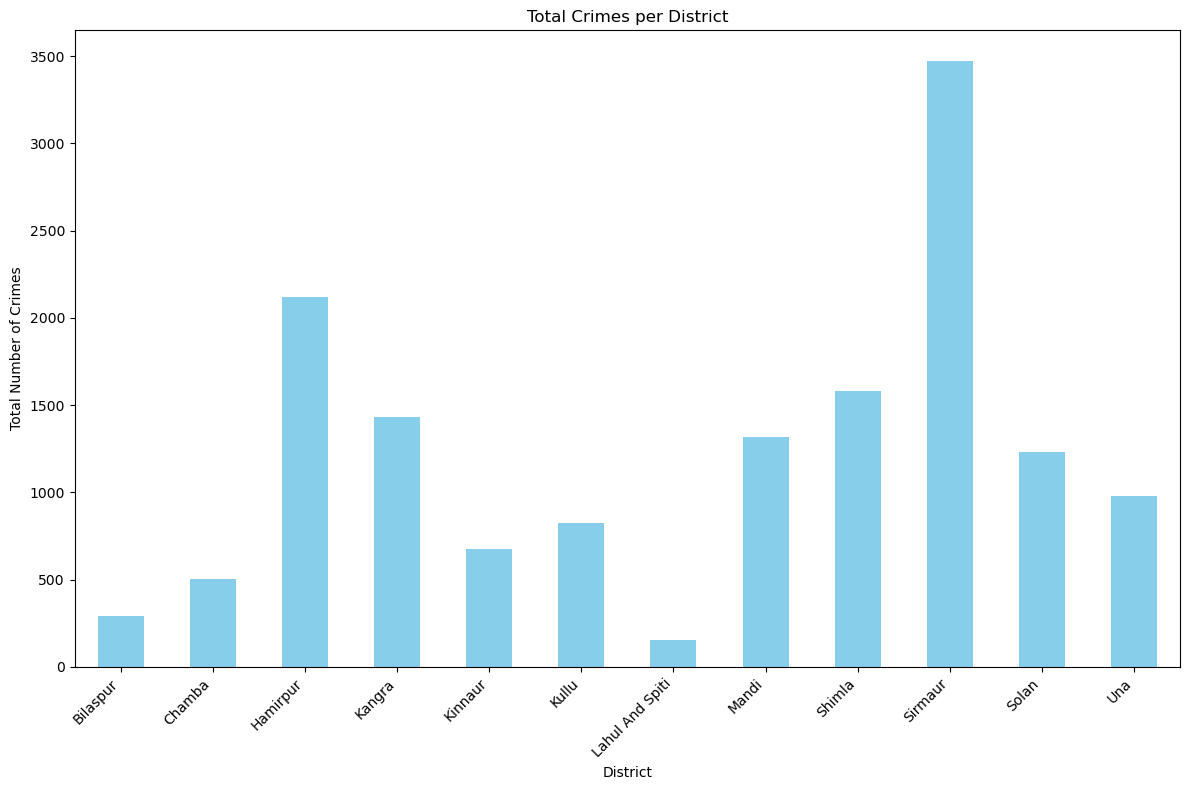

In [44]:
district_total_crimes = data.groupby('district_name')['total_crime_against_women'].sum()
    
# Create a bar chart of total crimes per district
plt.figure(figsize=(12, 8))
district_total_crimes.plot(kind='bar', color='skyblue')
plt.title('Total Crimes per District')
plt.xlabel('District')
plt.ylabel('Total Number of Crimes')
plt.xticks(rotation=45, ha='right')  # Rotate district names for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

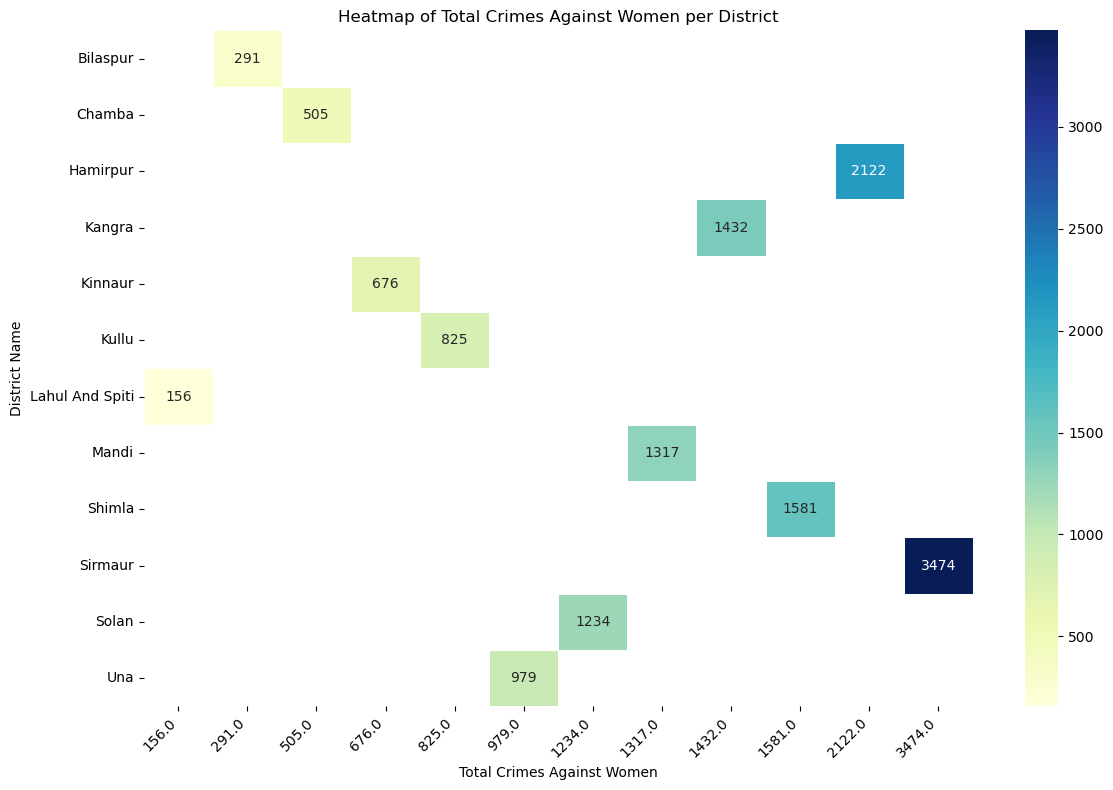

In [56]:
if 'district_name' in data.columns and 'total_crime_against_women' in data.columns:
    # Aggregate the total number of crimes against women per district
    district_total_crimes = data.groupby('district_name')['total_crime_against_women'].sum().reset_index()

    # Convert the aggregated data into a DataFrame suitable for heatmap
    crime_pivot = district_total_crimes.pivot(index='district_name', columns='total_crime_against_women', values='total_crime_against_women')

    # Create a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(crime_pivot, annot=True, cmap='YlGnBu', cbar=True, linewidths=0.5, fmt='g')
    plt.title('Heatmap of Total Crimes Against Women per District')
    plt.xlabel('Total Crimes Against Women')
    plt.ylabel('District Name')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()
else:
    print("The necessary columns are not found in the DataFrame.")